In [1]:
import bagpy
from bagpy import bagreader
import pandas as pd
import seaborn as sea
import numpy as np
import matplotlib.pyplot as plt

In [2]:
b = bagreader('/home/francis/catkin_ws/src/rtk_gps/Data/clear_moving.bag')

[INFO]  Data folder /home/francis/catkin_ws/src/rtk_gps/Data/clear_moving already exists. Not creating.


In [3]:
b.topic_table

,Topics,Types,Message Count,Frequency
0,/gnss,gnss_driver/gnss_msg,414,0.999879


In [4]:
def data_csv(b):
    csvfiles = []
    for t in b.topics:
        data = b.message_by_topic(t)
        csvfiles.append(data)
        
    print(csvfiles[0])
    data = pd.read_csv(csvfiles[0])
    return data

In [5]:
csv_data = data_csv(b)

/home/francis/catkin_ws/src/rtk_gps/Data/clear_moving/gnss.csv


In [6]:
f = pd.read_csv("/home/francis/catkin_ws/src/rtk_gps/Data/clear_moving/gnss.csv")

In [7]:
f['UTM_easting_median'] = f['UTM_easting'] - f['UTM_easting'].median(axis=0)
f['UTM_northing_median'] = f['UTM_northing'] - f['UTM_northing'].median(axis=0)

In [8]:
f

,Time,Header.seq,Header.stamp.secs,Header.stamp.nsecs,Header.frame_id,Latitude,Longitude,Altitude,UTM_easting,UTM_northing,Zone,Letter,quality,satellites,hdop,UTM_easting_median,UTM_northing_median
0,1.664997e+09,0,1665010942,0,GNSS1_Frame,42.338983,-71.084926,16.0,328247.278992,4.689519e+06,19,T,4,12,0.61,-15.164029,-22.234839
1,1.664997e+09,0,1665010943,0,GNSS1_Frame,42.338988,-71.084934,16.0,328246.646828,4.689520e+06,19,T,4,12,0.61,-15.796193,-21.682311
2,1.664997e+09,0,1665010944,0,GNSS1_Frame,42.338994,-71.084942,16.0,328245.949643,4.689521e+06,19,T,4,12,0.61,-16.493378,-20.980044
3,1.664997e+09,0,1665010945,0,GNSS1_Frame,42.339000,-71.084951,16.0,328245.279465,4.689521e+06,19,T,4,12,0.61,-17.163557,-20.296956
4,1.664997e+09,0,1665010946,0,GNSS1_Frame,42.339005,-71.084959,16.0,328244.605656,4.689522e+06,19,T,4,12,0.61,-17.837365,-19.761926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,1.664997e+09,0,1665011351,0,GNSS1_Frame,42.338954,-71.084889,16.0,328250.233978,4.689516e+06,19,T,4,12,0.61,-12.209044,-25.547976
410,1.664997e+09,0,1665011352,0,GNSS1_Frame,42.338954,-71.084889,16.0,328250.247254,4.689516e+06,19,T,4,12,0.61,-12.195767,-25.566820
411,1.664997e+09,0,1665011353,0,GNSS1_Frame,42.338954,-71.084888,16.0,328250.275622,4.689516e+06,19,T,4,12,0.61,-12.167399,-25.530479
412,1.664997e+09,0,1665011354,0,GNSS1_Frame,42.338954,-71.084889,15.9,328250.249523,4.689516e+06,19,T,4,12,0.61,-12.193498,-25.474284


In [9]:
f['quality']. value_counts()

4    382
5     27
2      5
Name: quality, dtype: int64

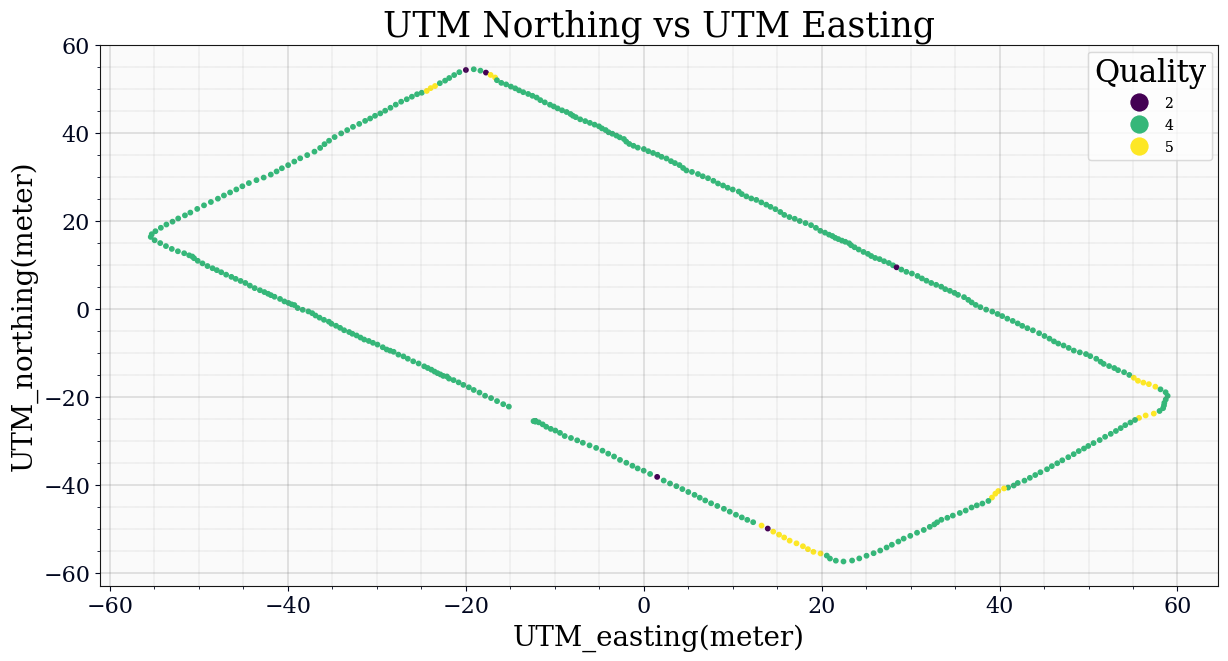

In [10]:
fig, a = bagpy.create_fig(1)
scatter = a[0].scatter(x='UTM_easting_median', y='UTM_northing_median', data=f, c='quality',s=10)
# y=f['UTM_easting_median'][0:120]
# x=f['UTM_northing_median'][0:120]
# m,b = np.polyfit(x,y,1)
#plt.plot(x,(m*x) + b,color="black")
plt.title("UTM Northing vs UTM Easting")
plt.xlabel("UTM_easting(meter)")
plt.ylabel("UTM_northing(meter)")
legend1 =a[0].legend(*scatter.legend_elements(), loc="upper right", title="Quality")
a[0].add_artist(legend1)

# plt.plot(x_e1, line_coords1[0]*x_e1+line_coords1[1], color='black',linewidth=2.0)
# plt.plot(x_e2, line_coords2[0]*x_e2+line_coords2[1], color='black',linewidth=2.0)
# plt.plot(x_e3, line_coords3[0]*x_e3+line_coords3[1], color='black',linewidth=2.0)
# plt.plot(x_e4, line_coords4[0]*x_e4+line_coords4[1], color='black',linewidth=2.0)
# plt.plot(x_e5, line_coords5[0]*x_e5+line_coords5[1], color='black',linewidth=2.0)

plt.show()

/home/francis/miniconda3/lib/python3.9/site-packages/matplotlib/collections.py:1084: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


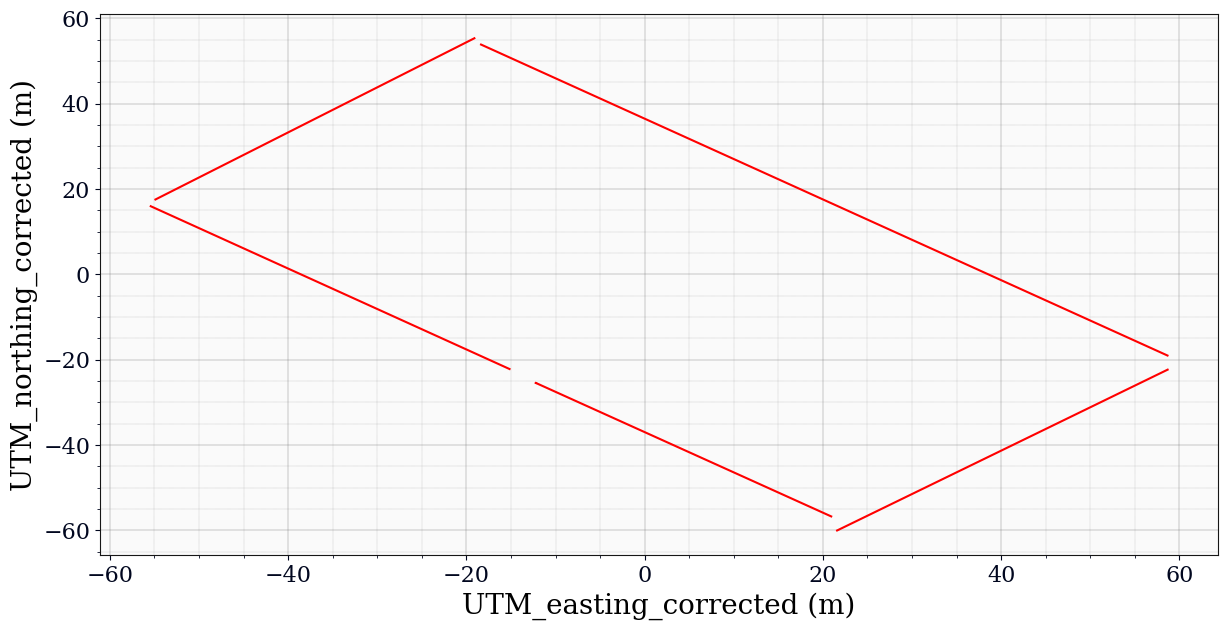

In [11]:
#corrected - the minimum of the each data in easting and northing was subtracted 
#from the  easting and northing datapoints respectively. 
fig, ax = bagpy.create_fig(1)
x_e1 = f['UTM_easting_median'][0:82]
y_e1 = f['UTM_northing_median'][0:82]
x_e2 = f['UTM_easting_median'][83:139]
y_e2 = f['UTM_northing_median'][83:139]
x_e3 = f['UTM_easting_median'][139:291]
y_e3 = f['UTM_northing_median'][139:291]
x_e4 = f['UTM_easting_median'][292:355]
y_e4 = f['UTM_northing_median'][292:355]
x_e5 = f['UTM_easting_median'][355:413]
y_e5 = f['UTM_northing_median'][355:413]
scatter = a[0].scatter(x='UTM_easting_median', y='UTM_northing_median', data=f, c = 'r')
plt.xlabel("UTM_easting_corrected (m)")
plt.ylabel("UTM_northing_corrected (m)")
legend1 = a[0].legend(*scatter.legend_elements(), loc="upper right", title="RTK Quality")
a[0].add_artist(legend1)
line_coords1, residual1, _, _, _ = np.polyfit(x_e1, y_e1, 1, full=True) 
line_coords2, residual2, _, _, _ = np.polyfit(x_e2, y_e2, 1, full=True) 
line_coords3, residual3, _, _, _ = np.polyfit(x_e3, y_e3, 1, full=True) 
line_coords4, residual4, _, _, _ = np.polyfit(x_e4, y_e4, 1, full=True)
line_coords5, residual5, _, _, _ = np.polyfit(x_e5, y_e5, 1, full=True)
plt.plot(x_e1, line_coords1[0]*x_e1+line_coords1[1], color='red')
plt.plot(x_e2, line_coords2[0]*x_e2+line_coords2[1], color='red')
plt.plot(x_e3, line_coords3[0]*x_e3+line_coords3[1], color='red')
plt.plot(x_e4, line_coords4[0]*x_e4+line_coords4[1], color='red')
plt.plot(x_e5, line_coords5[0]*x_e5+line_coords5[1], color='red')
#plt.savefig('/home/marley/walk.png')
plt.show()

In [12]:
Res=residual1+residual2+residual3+residual4+residual5
Mean_Res=(Res)/f.shape[0]
RMSE=np.sqrt(Mean_Res)
print(RMSE)

[0.30813299]


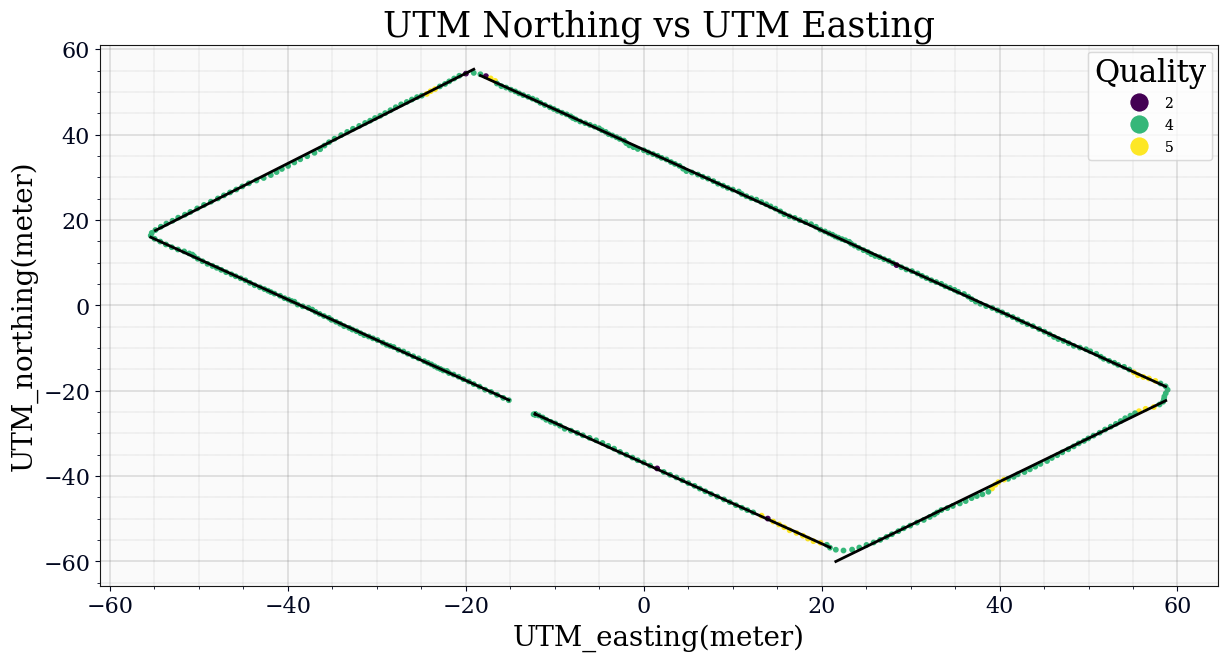

In [13]:
fig, a = bagpy.create_fig(1)
scatter = a[0].scatter(x='UTM_easting_median', y='UTM_northing_median', data=f, c='quality',s=10)
y=f['UTM_easting_median'][0:120]
x=f['UTM_northing_median'][0:120]
m,b = np.polyfit(x,y,1)
#plt.plot(x,(m*x) + b,color="black")
plt.title("UTM Northing vs UTM Easting")
plt.xlabel("UTM_easting(meter)")
plt.ylabel("UTM_northing(meter)")
legend1 =a[0].legend(*scatter.legend_elements(), loc="upper right", title="Quality")
a[0].add_artist(legend1)

plt.plot(x_e1, line_coords1[0]*x_e1+line_coords1[1], color='black',linewidth=2.0)
plt.plot(x_e2, line_coords2[0]*x_e2+line_coords2[1], color='black',linewidth=2.0)
plt.plot(x_e3, line_coords3[0]*x_e3+line_coords3[1], color='black',linewidth=2.0)
plt.plot(x_e4, line_coords4[0]*x_e4+line_coords4[1], color='black',linewidth=2.0)
plt.plot(x_e5, line_coords5[0]*x_e5+line_coords5[1], color='black',linewidth=2.0)

plt.show()

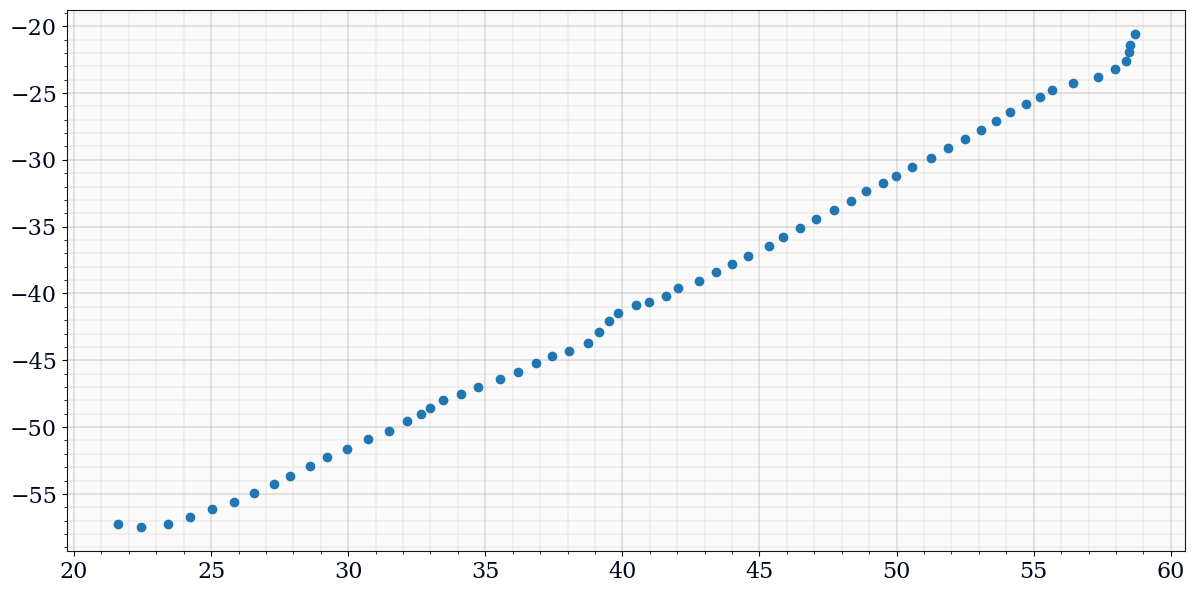

In [14]:
# fig, ax = bagpy.create_fig(1)
x_e1 = f['UTM_easting_median'][292:355]
y_e1 = f['UTM_northing_median'][292:355]

fig, a = bagpy.create_fig(1)

scatter = a[0].scatter(x=x_e1, y=y_e1)
#plt.savefig('/home/marley/walk.png')
plt.show()